참고문헌 : Pytel 외 저, 이주성 외 역, 재료역학, 2판, 한티미디어, 2013.<br>Ref: Pytel, Kiusalaas, Sharma, Mechanics of Materials, 2nd Ed., Cengege Learning, 2013.

`python` 기능을 확장해 주는 `module`을 불러 들임 (일부 기능만 사용될 수도 있음)

In [1]:
import numpy as np  # 배열, 행렬 관련 기능
import numpy.linalg as na  # 선형대수 (벡터, 행렬) 관련 기능
import matplotlib.pyplot as plt  # 그래프 관련 기능
import scipy.integrate as si  # 적분 관련 기능
import sympy as sy  # 기호 연산 기능
import IPython.display as disp  # 웹페이지 표시 기능
sy.init_printing()  # 기호 연산 결과 표시 기능 준비

# 예제 05.010<br>Example 05.010

## 문제에서 주어진 값<br>Given Values

### 길이<br>Lengths

In [2]:
L_AB_m = 5
L_AD_m = 10
L_DE_m = 5

L_BD_m = L_AD_m - L_AB_m
L_AE_m = L_AD_m + L_DE_m

### x 좌표<br>x coordinates

A 점에서 $x=0$ 으로 한다.<br>$x = 0$ at A.

In [3]:
x_A_m = 0
x_B_m = x_A_m + L_AB_m
x_D_m = x_B_m + L_BD_m
x_E_m = x_D_m + L_DE_m

### 하중<br>Load

In [4]:
P_N = 1

P_B_N = -2 * P_N
P_E_N = -1 * P_N

### 반력<br>Reaction Force

In [5]:
R_A_N = 0.5 * P_N
R_D_N = 2.5 * P_N

### 단면<br>Section

폭 $b$, 높이 $h$, 판 두께 $t$ 는 다음과 같다.<br>Width $b$, height $h$, plate thickness $t$ are as follows.

In [6]:
b_m = 240e-3
h_m = 300e-3
t_m = 30e-3

최대 굽힘응력 발생 위치는 전체 단면 높이의 절반이다.<br>Maximum bending stress occurs at the half of the height

In [7]:
c_m = h_m / 2

속이 비어 있는 단면이므로 바깥 단면의 $I$를 구하고 빈 단면의 $I$를 빼 준다.<br>Because the section is hallow, subtract the I of the empty inside.

In [8]:
I_m4 = b_m * h_m**3 / 12 - ((b_m - 2 * t_m) * (h_m - 2 * t_m)**3 / 12)

### 재료<br>Material Properties

In [9]:
sigma_w_Pa = 6e6
tau_w_Pa = 0.6e6

## 최대 굽힘 응력<br>Max Bending Stress

최대 굽힘 모멘트가 발생하는 위치는 BMD 를 그려 보면 알 수 있다.<br>Using BMD, one can find where the maximum bending stress occurs.

### 표시 방법 선택<br>Print options

아래와 같이 긴 `numpy.ndarray` 표시 방법을 정할 수 있다.<br>One can set how to indicate a long `numpy.ndarray` as below.

In [10]:
# PaulMag et. al, Print the full numpy array, StackOverflow, 2014 Sep. 24, https://stackoverflow.com/questions/1987694/print-the-full-numpy-array
np.set_printoptions(threshold=10)

### x 좌표 배열<br>x coordinate array

A~E 구간의 x 좌표 배열을 다음과 같이 준비해 둔다.<br>Prepare an array of x coordinates between A and E.

In [11]:
delta_x_m = 0.01
x_m_array = np.arange(x_A_m, x_E_m + 0.5 * delta_x_m, delta_x_m)
x_m_array

array([  0.00000000e+00,   1.00000000e-02,   2.00000000e-02, ...,
         1.49800000e+01,   1.49900000e+01,   1.50000000e+01])

### 전단력선도<br>Shear Force Diagram

x' 지점에 위치하는 집중하중 $P$의 전단력선도는 x 좌표값이 x' 보다 작을 때는 0 이었다가 x'보다 커지면 $P$가 된다.<br>The Shear Force Diagram of a concentrated load $P$ at $x'$ is 0 when $x$ is smaller than $x'$ and P when $x$ is larger than $x'$.

A 지점에서의 반력<br>Reaction force at A.

In [12]:
ones_array = np.ones_like(x_m_array)
ones_array[x_m_array < x_A_m] = 0.0
R_A_N_array = R_A_N * ones_array

B 지점에서의 하중<br>Load at B.

In [13]:
ones_array = np.ones_like(x_m_array)
ones_array[x_m_array < x_B_m] = 0.0
P_B_N_array = P_B_N * ones_array

D 지점에서의 반력<br>Reaction force at D.

In [14]:
ones_array = np.ones_like(x_m_array)
ones_array[x_m_array < x_D_m] = 0.0
R_D_N_array = R_D_N * ones_array

E 지점에서의 하중<br>Load at E.

In [15]:
ones_array = np.ones_like(x_m_array)
ones_array[x_m_array < x_E_m] = 0.0
P_E_N_array = P_E_N * ones_array

모두 합하면 다음과 같다.

In [16]:
V_N_array = R_A_N_array + P_B_N_array + R_D_N_array + P_E_N_array
V_N_array

array([ 0.5,  0.5,  0.5, ...,  1. ,  1. ,  0. ])

In [17]:
plt.fill_between(x_m_array, V_N_array)
plt.ylabel('V(N)/P(N)')

A 지점에서의 반력을 화살표로 표시한다.<br>Indicate reaction force at A using an arrow.

In [18]:
ax = plt.axes()
ax.arrow(x_A_m, 0, 
         0, R_A_N * 0.9, 
         head_width=0.05, head_length=0.1 * abs(R_A_N), fc='k', ec='k')

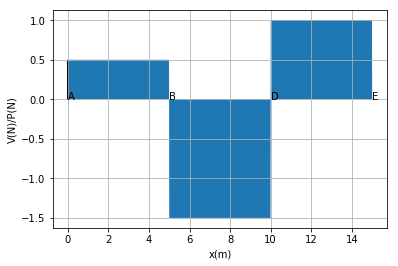

In [19]:
plt.text(x_A_m, 0, 'A')
plt.text(x_B_m, 0, 'B')
plt.text(x_D_m, 0, 'D')
plt.text(x_E_m, 0, 'E')
plt.xlabel('x(m)')
plt.grid(True)
plt.show()

### 굽힘모멘트 선도<br>Bending Moment Diagram

A 지점에서의 반력<br>Reaction force at A.

In [20]:
arm_m_array = x_m_array - x_A_m
arm_m_array[arm_m_array < 0] = 0.0
M_R_A_Nn_array = R_A_N * arm_m_array

B 지점에서의 하중<br>Load at B.

In [21]:
arm_m_array = x_m_array - x_B_m
arm_m_array[arm_m_array < 0] = 0.0
M_P_B_Nm_array = P_B_N * arm_m_array

D 지점에서의 반력<br>Reaction force at D.

In [22]:
arm_m_array = x_m_array - x_D_m
arm_m_array[arm_m_array < 0] = 0.0
M_R_D_Nm_array = R_D_N * arm_m_array

E 지점에서의 하중<br>Load at E.

In [23]:
arm_m_array = x_m_array - x_E_m
arm_m_array[arm_m_array < 0] = 0.0
M_P_E_Nm_array = P_E_N * arm_m_array

모두 합하면 다음과 같다.

In [24]:
M_Nm_array = M_R_A_Nn_array + M_P_B_Nm_array + M_R_D_Nm_array + M_P_E_Nm_array
V_N_array

array([ 0.5,  0.5,  0.5, ...,  1. ,  1. ,  0. ])

In [25]:
plt.fill_between(x_m_array, M_Nm_array)
plt.ylabel('M(Nm)/P(N)')

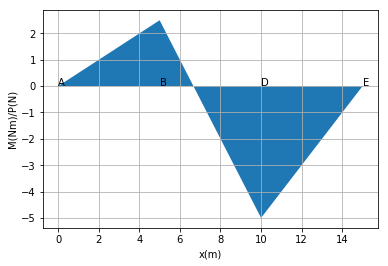

In [26]:
plt.text(x_A_m, 0, 'A')
plt.text(x_B_m, 0, 'B')
plt.text(x_D_m, 0, 'D')
plt.text(x_E_m, 0, 'E')
plt.xlabel('x(m)')
plt.grid(True)
plt.show()

### 최대 굽힘 모멘트<br>Maximum Bending Moment

In [27]:
max_bending_moment_Nm = max(abs(M_Nm_array))
max_bending_moment_Nm

최대 법선응력 $\sigma_{max}$[Pa] 를 $P$[N] 로 나눈 값은 다음과 같다.<br>Following is the maximum normal stress $\sigma_{max}$[Pa] divide by $P$[N].

In [28]:
sigma_max_P_N_Pa = max_bending_moment_Nm * c_m / I_m4 
sigma_max_P_N_Pa

위 값으로 허용 응력을 나누면 다음과 같다.

In [29]:
sigma_w_Pa / sigma_max_P_N_Pa

#### 굽힘 법선응력의 분포<br>Distribution of bending normal stress.

y 좌표 배열<br>y coordinate array

In [30]:
y_m_array = np.linspace(-h_m*0.5, h_m*0.5, 51)

x y 좌표 격자<br>x y coordinate grids

In [31]:
y_m_grid, x_m_grid = np.meshgrid(y_m_array, x_m_array)

격자의 행 수와 열 수는 각각 다음과 같다.<br>The numbers of rows and columns of the grid are as follows.

In [32]:
x_m_grid.shape

각 격자의 굽힘 응력값을 계산하기 위해 굽힘모멘트 값의 격자도 준비한다.<br>To calculate the grid of the bending stress, prepare for the grid of the bending moment.

In [33]:
y_m_grid, M_Nm_grid = np.meshgrid(y_m_array, M_Nm_array)

굽힘응력의 분포를 계산한다.<br>Calculate the distribution of the bending stress.

In [34]:
sigma_Pa_grid = M_Nm_grid * y_m_grid / (- I_m4)

굽힘응력의 분포를 표시한다. 빨간색은 인장, 파란색은 압축 응력 상태를 표시한다.<br>Present the distribution fo the bending stress. Red and blue indicate tensile and compressive stresses respectively.

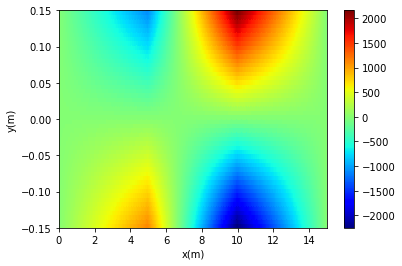

In [35]:
plt.pcolor(x_m_grid, y_m_grid, sigma_Pa_grid, cmap='jet')
plt.xlabel('x(m)')
plt.ylabel('y(m)')
plt.colorbar()
plt.show()

## 최대 전단응력<br>Maximum Shear Stress

전단력 $V$ 에 의한 전단응력 $\tau$ 은 p. 199 eq. 5.8 로 부터 다음과 같다.<br>From eq 5.8, shear stress $\tau$ by shear force $V$ is as follows.

$$\tau=\frac{VQ}{Ib}$$

여기서 $Q$ 는 p. 197 eq. 5.7b 로 부터 다음과 같다.<br>Here, $Q$ is as follows from eq. 5.7b.

$$Q = A' \overline{y'}$$

최대 전단응력은 전단력이 최대인 지점의 중립면에서 발생할 것이다.<br>Maximum shear stress would occur at the neutral axis under maximum shear force.

윗 판의 단면적과 도심~중립면 거리는 다음과 같다.<br>Top plate's area and distance from centroid to neutral axis is as follows.

In [36]:
A_top_m2 = b_m * t_m

In [37]:
y_bar_top_m = h_m * 0.5 - t_m * 0.5

In [38]:
Q_top_m3 = A_top_m2 * y_bar_top_m

옆 판의 단면적과 도심~중립면 거리는 다음과 같다.<br>Side plate's area and distance from centroid to neutral axis is as follows.

In [39]:
A_side_m2 = (h_m - 2 * t_m) * 0.5 * t_m

In [40]:
y_bar_side_m = (h_m - 2 * t_m) * 0.5*0.5

In [41]:
Q_side_m3 = A_side_m2 * y_bar_side_m

단면 전체의 Q는 다음과 같다. (옆판은 2개 있다)<br>Total Q is as follows. (Note that there are two side plates)

In [42]:
Q_m3 = Q_top_m3 + 2 * Q_side_m3

최대 전단응력 $\tau_{max}$[Pa] 를 $P$[N] 로 나눈 값은 다음과 같다.<br>Following is the maximum shear stress $\tau_{max}$[Pa] divide by $P$[N].

In [43]:
tau_max_P_N_Pa = 1.5 * Q_m3 / (I_m4 * (2*t_m))
tau_max_P_N_Pa

위 값으로 허용 전단응력을 나누면 다음과 같다.<br>Dividing allowable shear stress by value above gives follows.

In [44]:
tau_w_Pa / tau_max_P_N_Pa